# Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
data2=pd.read_csv("C:\\Users\\Anks\\Downloads\\delivery_time (1).csv")
data2

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
data2.columns=["D1","S1"]
data2.head()

,D1,S1
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D1      21 non-null     float64
 1   S1      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
data2.corr()

,D1,S1
D1,1.000000,0.825997
S1,0.825997,1.000000


<AxesSubplot:xlabel='S1', ylabel='D1'>

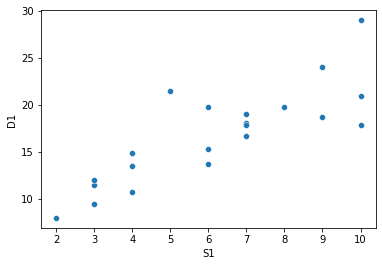

In [13]:
sns.scatterplot(x=data2["S1"], y=data2["D1"])

In [18]:
x=np.array(data2["S1"])
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  1
Shape :  (21,)


In [19]:
x=x.reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (21, 1)


In [22]:
y=np.array(data2["D1"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (21, 1)


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [24]:
print("Length of X_train : ", len(x_train))
print("Length of Y_train : ", len(y_train))
print("Length of X_test : ", len(x_test))
print("Length of Y_test : ", len(y_test))

Length of X_train :  16
Length of Y_train :  16
Length of X_test :  5
Length of Y_test :  5


In [26]:
x_test

array([[4],
       [6],
       [9],
       [4],
       [7]], dtype=int64)

In [27]:
y_test

array([[10.75],
       [19.75],
       [18.75],
       [14.88],
       [18.11]])

In [28]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
model.score(x_test,y_test)

0.48981272343374216

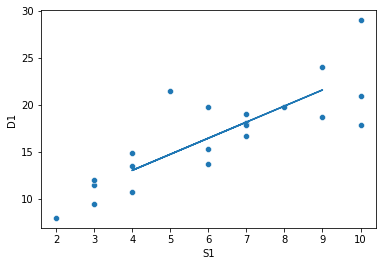

In [31]:
sns.scatterplot(x=data2["S1"],y=data2["D1"])
plt.plot(x_test,model.predict(x_test))
plt.show()

In [32]:
model.coef_

array([[1.7079955]])

In [33]:
model.intercept_

array([6.22315315])

In [34]:
y_predicted = model.predict(x_test)
y_predicted = np.round(y_predicted,2)
y_predicted

array([[13.06],
       [16.47],
       [21.6 ],
       [13.06],
       [18.18]])

In [35]:
x_test[0:,0]

array([4, 6, 9, 4, 7], dtype=int64)

In [37]:
y_test[0:,0]

array([10.75, 19.75, 18.75, 14.88, 18.11])

In [38]:
data_1 = {"Test_Sorting_Time" : x_test[0:,0], "Actual_Delivery_Time" : y_test[0:,0], "Predicted_Delivery_Time" : y_predicted[0:,0]}
data_1 = pd.DataFrame(data_1)
data_1.to_csv("C:\\Users\\Anks\\Downloads\\delivery_time (1).csv")
data_1.head()

,Test_Sorting_Time,Actual_Delivery_Time,Predicted_Delivery_Time
0,4,10.75,13.06
1,6,19.75,16.47
2,9,18.75,21.60
3,4,14.88,13.06
4,7,18.11,18.18


In [39]:
import statsmodels.formula.api as smf


In [41]:
linear_model = smf.ols("y~x", data=data2).fit()


In [42]:
linear_model.params

Intercept    6.582734
x            1.649020
dtype: float64

In [43]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        00:19:22   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""